In [1]:
from environment import Environment
import matplotlib.pyplot as plt
import math
import numpy as np
from game import SumUnanimityGames, GlobalFeatureImportance, LocalFeatureImportance
from plot import plot

In [2]:
from algorithms.halfbus import HalfBUS
from algorithms.CMCS import CMCS, SIR_CMCS
from algorithms.ApproShapley import ApproShapley
from algorithms.BUS import BUS
from algorithms.HybridApproBUS import SmartHybridApproBUS
from algorithms.SVARM import SVARM, StratSVARM
from algorithms.ShapleySort import ShapleySort

In [3]:
from algorithms.SVARM import oldStratSVARM


In [4]:
n=14
k=3
budget=1500
rounds=500
step_interval=20
metric = "ratio"
env = Environment(n=n, budget=budget, metric=metric)
results = []

In [5]:
filepath = "datasets/adult classification"
# game = GlobalFeatureImportance(filepath=filepath, num_players=n, use_cached=True)
game = LocalFeatureImportance(directory=filepath, num_players=n)

In [6]:
# results += [("SIR_CMCS", env.evaluate(game, SIR_CMCS(), k, step_interval, rounds))]

In [7]:
results += [("CMCS", env.evaluate(game, CMCS(), k, step_interval, rounds))]


In [8]:
# results += [("HalfBUS", env.evaluate(game, HalfBUS(focus=n), k, step_interval, rounds))]

In [9]:
# results += [("StratSVARM(start_exact=True, theoretical_distribution=True)", env.evaluate(game, StratSVARM(start_exact=True, theoretical_distribution=True), k, step_interval, rounds))]

In [10]:
# results += [("StratSVARM(start_exact=True, theoretical_distribution=False)", env.evaluate(game, StratSVARM(start_exact=True, theoretical_distribution=False), k, step_interval, rounds))]

In [11]:
# results += [("ApproShapley(optimized)", env.evaluate(game, ApproShapley(optimize=True), k, step_interval, rounds))]

In [12]:
# results += [("SVARM", env.evaluate(game, SVARM(), k, step_interval, rounds))]

In [13]:
# results += [("BUS", env.evaluate(game, BUS(), k, step_interval, rounds))]

In [14]:
# results += [("SmartHybridApproBUS(switch=10)", env.evaluate(game, SmartHybridApproBUS(switch=10), k, step_interval, rounds))]

In [15]:
# results += [("ShapleySort", env.evaluate(game, ShapleySort(), k, step_interval, rounds))]

In [16]:
# results += [("SIRHalfBUS", env.evaluate(game, SIRHalfBUS(), k, step_interval, rounds))]

In [17]:
plot(results, step_interval=step_interval, types=["topk", "mse", "percentage"], metric=metric, save=True, filepath=f"results/{game.__class__.__name__}({filepath.split('/')[-1]})_n={n}_k={k}_T={budget}_r={rounds}_{metric}.pdf")

In [18]:
np.isin([[1,2,3],[3,4,5]], [2,3]).sum(axis=1)

array([2, 1])

In [19]:
pre_samples = 10

In [20]:
lengths = np.random.randint(n+1, size=(pre_samples))
lengths

array([ 7,  8, 12,  9,  3,  8, 10, 10, 10,  9])

In [21]:
np.mgrid[0:4, 0:4][1]

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [22]:
import pandas as pd

In [23]:
dataset = "datasets/Global feature importance/German credit classification random forest.csv"

In [24]:
df = pd.read_csv(dataset)
df.tail()

,coalition,value
1048571,0|1|2|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.080000
1048572,0|1|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.043333
1048573,0|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.056667
1048574,1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.040000
1048575,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.060000


In [25]:
def index_to_coalition(index):
    view = np.array([index]).view(np.uint8)
    return np.where(np.unpackbits(view, bitorder='little'))[0]

def coalition_to_index(coalition):
    return np.sum(1 << coalition)

In [26]:
def binom(n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [27]:
n = 4
player_weights = np.random.rand(n)
weights = np.zeros(2**n)
total_weights_real = 0
for i in range(2**n):
    coalition = index_to_coalition(i)
    if i == 0:
        weights[i] = np.mean(player_weights)
    else:
        weights[i] = player_weights[coalition].mean()
weights, np.sum(weights)

(array([0.64749829, 0.02208903, 0.92096157, 0.4715253 , 0.84961151,
        0.43585027, 0.88528654, 0.59755404, 0.79733105, 0.40971004,
        0.85914631, 0.58012722, 0.82347128, 0.55634386, 0.85596804,
        0.64749829]),
 10.359972632235316)

In [28]:
total_weights = player_weights.mean()
for player in range(n):
    for length in range(1, n+1):
        total_weights += binom(n-1, length-1) * player_weights[player] / length
total_weights

10.359972632235316

In [29]:
values = np.random.rand(2**n)

In [30]:
coalition_weights = np.zeros(n)
for length in range(n):
    coalition_weights[length] = 1/(n*binom(n-1, length))

phi = np.zeros(n)
for index in range(2**n):
    coalition = index_to_coalition(index)
    length = coalition.shape[0]
    for player in range(n):
        if player in coalition:
            phi[player] += coalition_weights[length-1] * values[index]
        else:
            phi[player] -= coalition_weights[length] * values[index]
phi

array([0.12290123, 0.18467299, 0.16740595, 0.28261607])

In [31]:
coalition_weights_plus = np.array([1/((n+1)*binom(n, l)) for l in range(n+1)])

In [32]:
num_iter = 1000
phi_hat = np.zeros(n)
pdf = weights/total_weights
for t in range(num_iter):
    length = np.random.randint(n+1)
    coalition = np.arange(n)
    np.random.shuffle(coalition)
    coalition = coalition[:length]
    index = coalition_to_index(coalition)
    # index = np.random.choice(np.arange(2**n), p=pdf)
    # coalition = index_to_coalition(index)
    # actual_weight = coalition_weights_plus[coalition.shape[0]]
    for player in range(n):
        if player in coalition:
            marginal = values[index] - values[coalition_to_index(coalition[coalition != player])]
            # marginal *= actual_weight/pdf[index]
            phi_hat[player] +=  marginal
        else:
            marginal = values[coalition_to_index(np.concatenate((coalition, [player])))] - values[index]
            # marginal *= actual_weight/pdf[index]
            phi_hat[player] += marginal
phi_hat/num_iter

array([0.127705  , 0.17578109, 0.16528889, 0.27880915])

In [33]:
num_sets_per_length = np.array([binom(n, l) for l in range(n+1)])
min_index_per_length = [np.sum(num_sets_per_length[:l]) for l in range(n+1)]
min_index_per_length

[0.0, 1.0, 5.0, 11.0, 15.0]

In [34]:
def pdf(x, mu, variance):
    return  np.exp((-(x-mu)**2)/(2*variance)) / np.sqrt(2*math.pi*variance)

<BarContainer object of 100 artists>

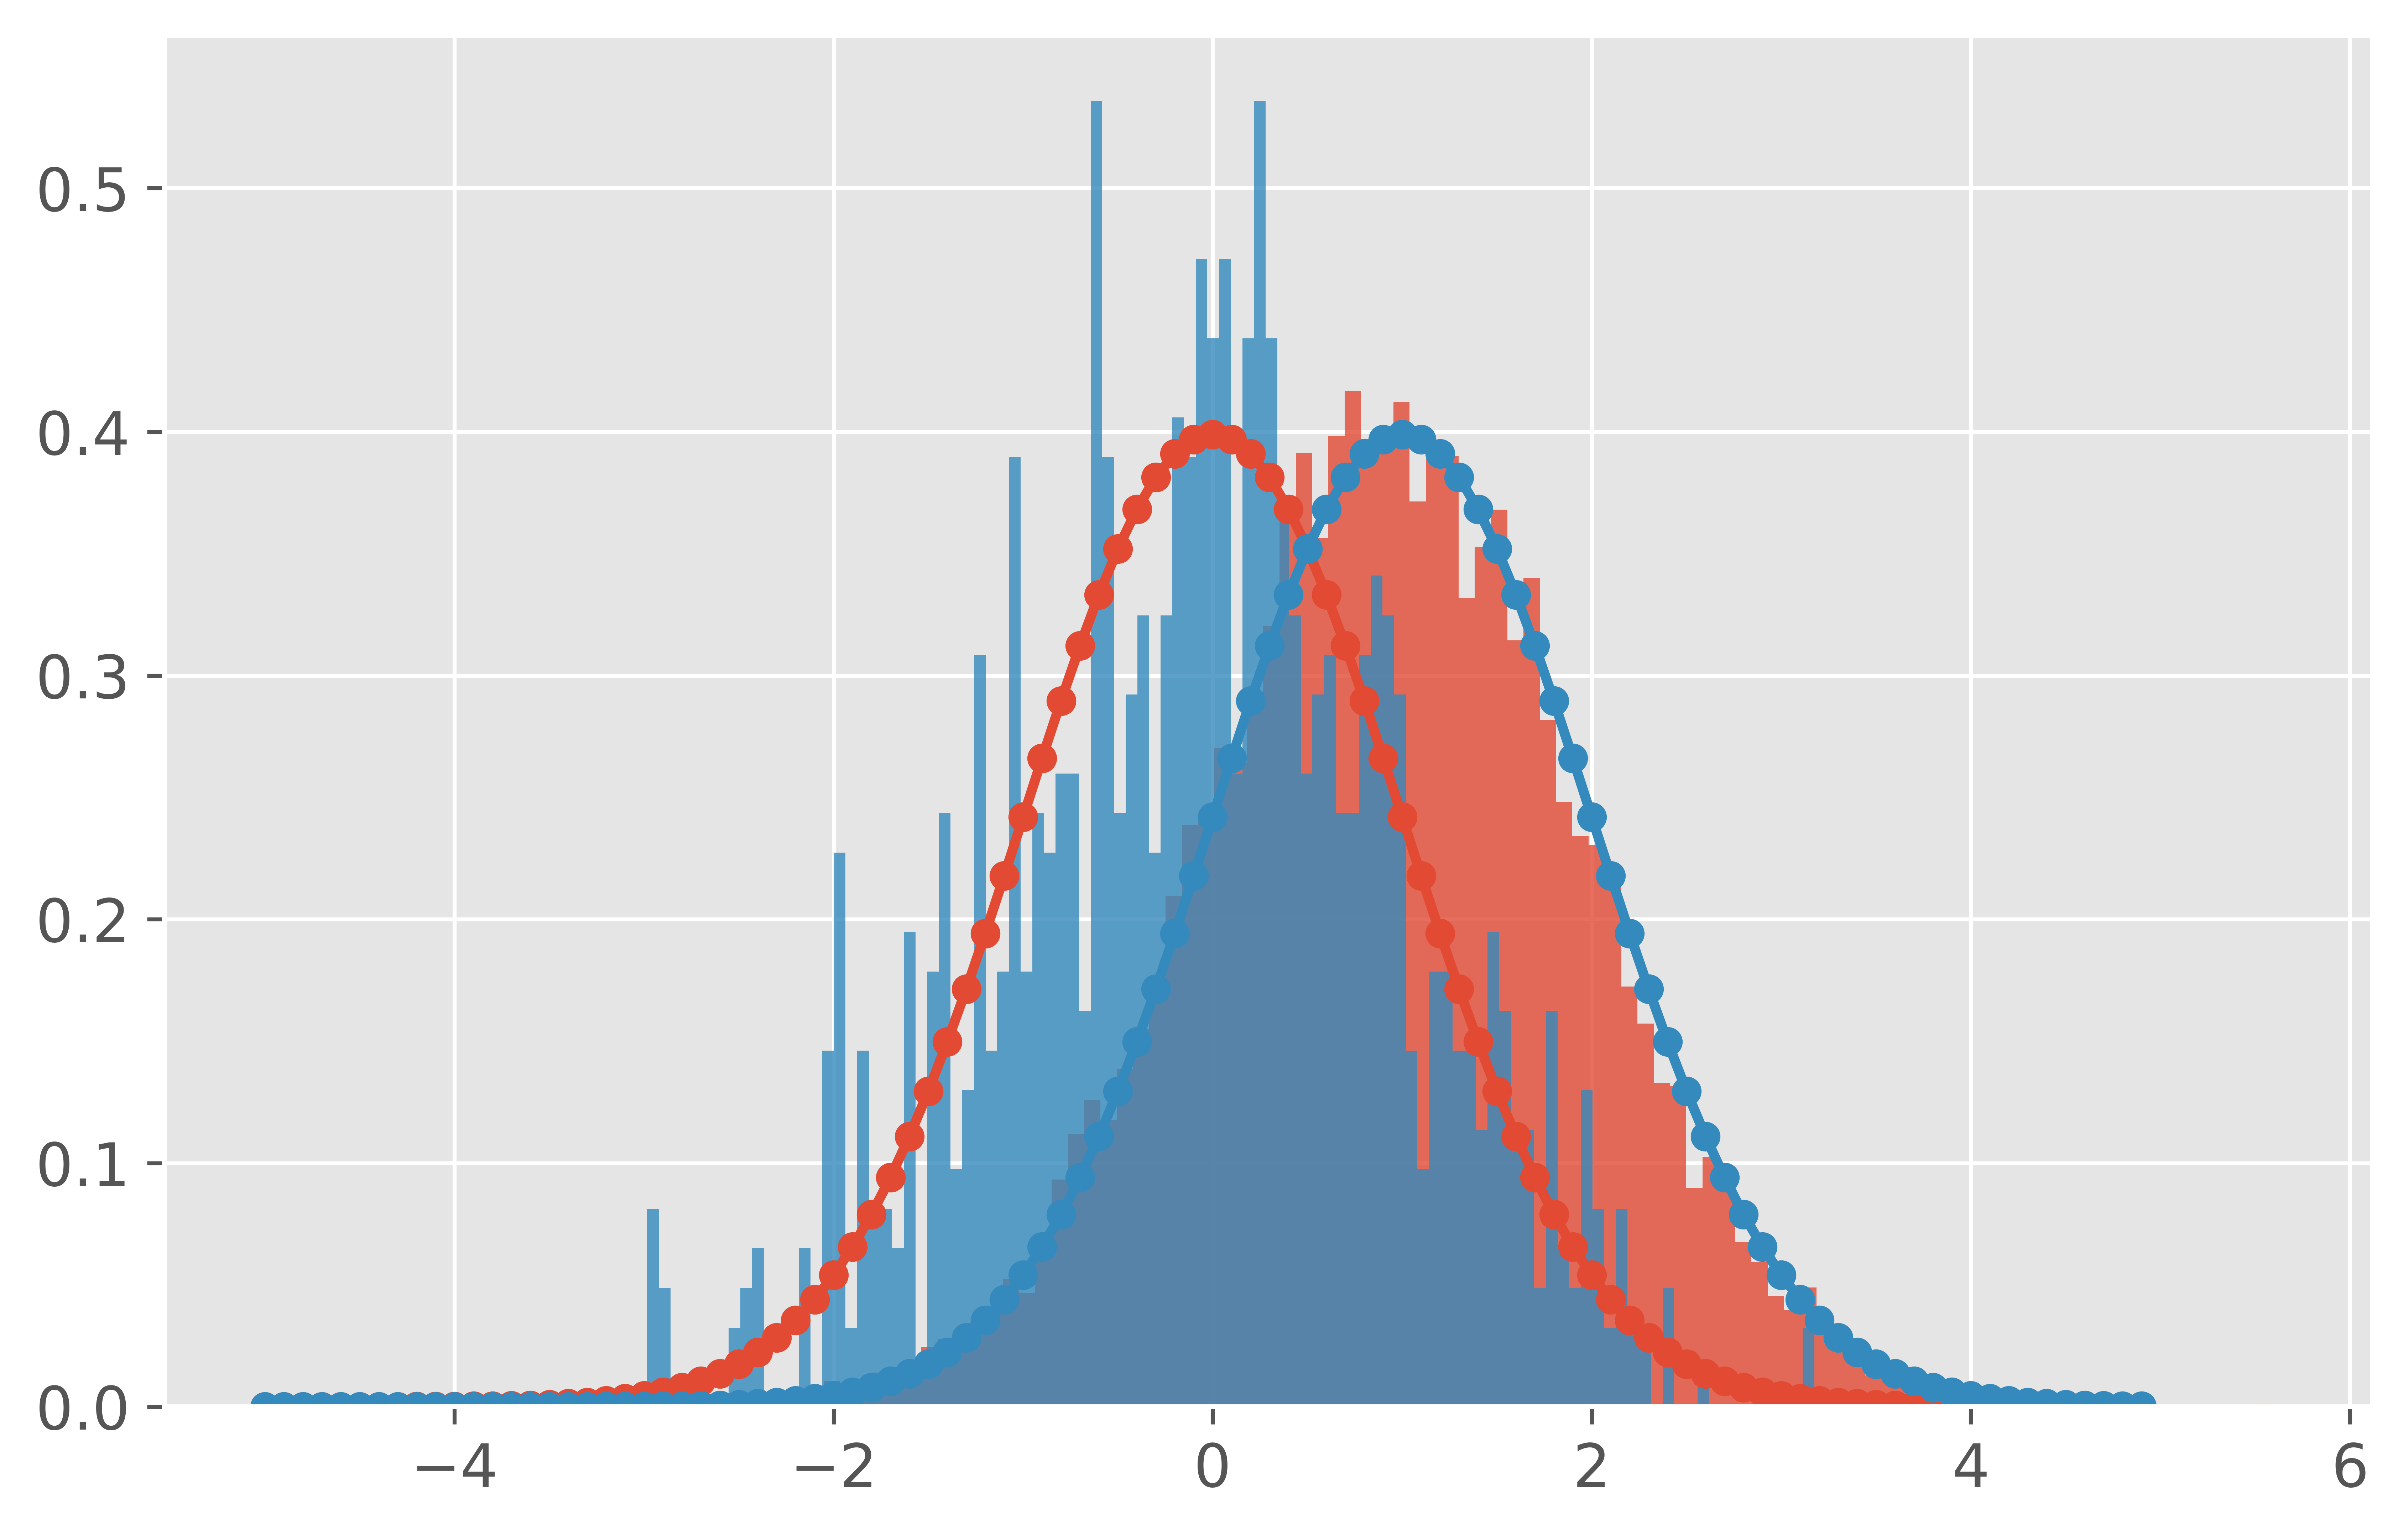

In [35]:
plt.style.use(plt.style.library['ggplot'])
plt.rcParams.update({'font.size': 12})
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.markersize'] = 10
fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
x = np.arange(100)/10 - 5
target_mu = 3
target_sigma = 1
values1 = pdf(x, 0, 1)
values2 = pdf(x, 1, 1)
samples = np.random.normal(1, 1, (10000))
weights = pdf(samples, 0, 1) / pdf(samples, 1, 1)
sum_weights = np.sum(weights)
new_samples = np.zeros((1000))
for j in range(1000):
    totalweight = 0
    for i, sample in enumerate(samples):
        totalweight += weights[i]
        if np.random.rand() < weights[i]/totalweight:
            new_samples[j] = sample
    # new_samples[j] = np.random.choice(samples, p=weights/sum_weights)

def histo(samples):
    num, edges = np.histogram(samples, bins=100)
    x = edges[:-1]
    width = edges[1:]-edges[:-1]
    area = np.sum(num * width)
    densities = num/area
    return x, densities, width 
ax.plot(x, values1, ".-", linewidth=2.0)
ax.plot(x, values2, ".-", linewidth=2.0)
preX, preDensity, preWidth  = histo(samples)
newX, newDensity, newWidth  = histo(new_samples)
ax.bar(preX, preDensity, preWidth, alpha=0.8)
ax.bar(newX, newDensity, newWidth, alpha=0.8)
# ax.plot(np.sort(samples), pdf(np.sort(samples), 1, 1), ".-", linewidth=2.0)